In [48]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [2]:
blood_pressure_df = pd.read_excel("datasets/PPG-BP dataset.xlsx", header = 1)

In [3]:
blood_pressure_df

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,1,2,Female,45,152,63,161,89,97,27.268006,Stage 2 hypertension,NaN,NaN,NaN
1,2,3,Female,50,157,50,160,93,76,20.284799,Stage 2 hypertension,NaN,NaN,NaN
2,3,6,Female,47,150,47,101,71,79,20.888889,Normal,NaN,NaN,NaN
3,4,8,Male,45,172,65,136,93,87,21.971336,Prehypertension,NaN,NaN,NaN
4,5,9,Female,46,155,65,123,73,73,27.055151,Prehypertension,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,415,Male,24,180,70,111,70,77,21.604938,Normal,NaN,NaN,NaN
215,216,416,Female,25,156,47,93,57,79,19.312952,Normal,NaN,NaN,NaN
216,217,417,Male,25,176,55,120,69,72,17.755682,Prehypertension,NaN,NaN,NaN
217,218,418,Male,25,173,63,106,69,67,21.049818,Normal,NaN,NaN,NaN


In [4]:
blood_pressure_df.drop(columns = ["subject_ID", "Num.", "Height(cm)", "Weight(kg)"], inplace = True)

In [5]:
blood_pressure_df.isnull().sum() / len(blood_pressure_df) * 100

Sex(M/F)                           0.000000
Age(year)                          0.000000
Systolic Blood Pressure(mmHg)      0.000000
Diastolic Blood Pressure(mmHg)     0.000000
Heart Rate(b/m)                    0.000000
BMI(kg/m^2)                        0.000000
Hypertension                       0.000000
Diabetes                          82.648402
cerebral infarction               90.867580
cerebrovascular disease           88.584475
dtype: float64

In [6]:
blood_pressure_df.drop(columns = ["Diabetes", "cerebral infarction", "cerebrovascular disease"], inplace = True)

In [7]:
pd.unique(blood_pressure_df["Sex(M/F)"])

array(['Female', 'Male'], dtype=object)

In [8]:
pd.unique(blood_pressure_df["Hypertension"])

array(['Stage 2 hypertension', 'Normal', 'Prehypertension',
       'Stage 1 hypertension'], dtype=object)

In [9]:
blood_pressure_df["Sex(M/F)"] = pd.factorize(blood_pressure_df["Sex(M/F)"])[0]

In [10]:
blood_pressure_df["Hypertension"] = pd.factorize(blood_pressure_df["Hypertension"])[0]

In [11]:
blood_pressure_df

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension
0,0,45,161,89,97,27.268006,0
1,0,50,160,93,76,20.284799,0
2,0,47,101,71,79,20.888889,1
3,1,45,136,93,87,21.971336,2
4,0,46,123,73,73,27.055151,2
...,...,...,...,...,...,...,...
214,1,24,111,70,77,21.604938,1
215,0,25,93,57,79,19.312952,1
216,1,25,120,69,72,17.755682,2
217,1,25,106,69,67,21.049818,1


In [12]:
corr_matrix = blood_pressure_df.corr()

<Axes: ylabel='Age(year)'>

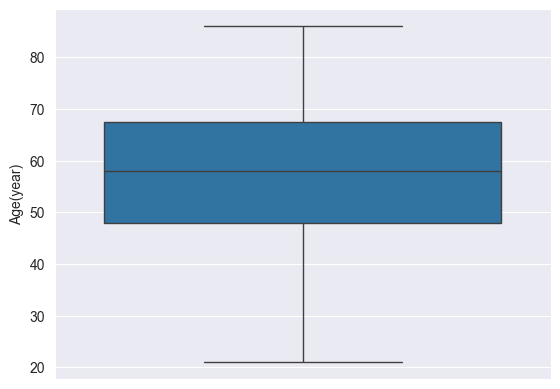

In [13]:
sns.boxplot(data = blood_pressure_df["Age(year)"])

<Axes: ylabel='Systolic Blood Pressure(mmHg)'>

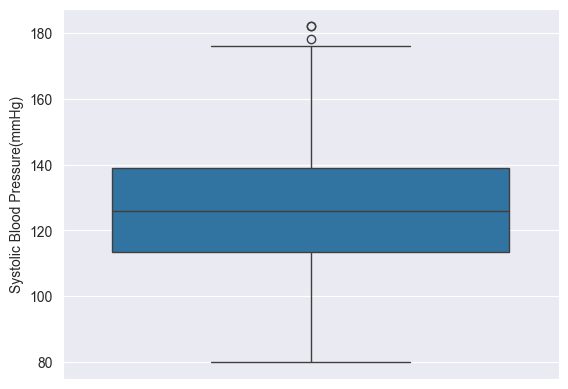

In [14]:
sns.boxplot(data = blood_pressure_df["Systolic Blood Pressure(mmHg)"])

<Axes: ylabel='Diastolic Blood Pressure(mmHg)'>

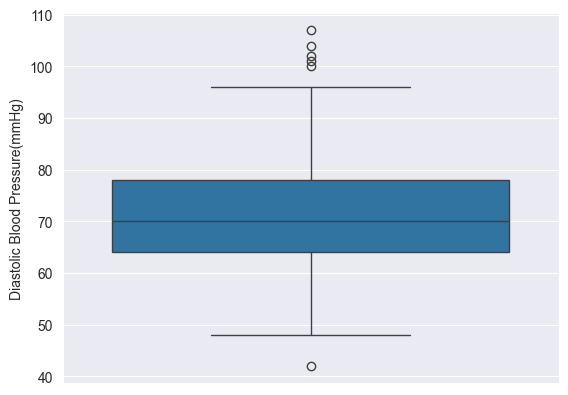

In [15]:
sns.boxplot(data = blood_pressure_df["Diastolic Blood Pressure(mmHg)"])

<Axes: ylabel='Heart Rate(b/m)'>

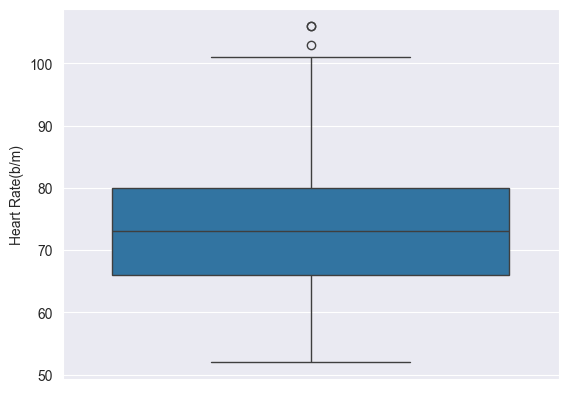

In [16]:
sns.boxplot(data = blood_pressure_df["Heart Rate(b/m)"])

<Axes: ylabel='BMI(kg/m^2)'>

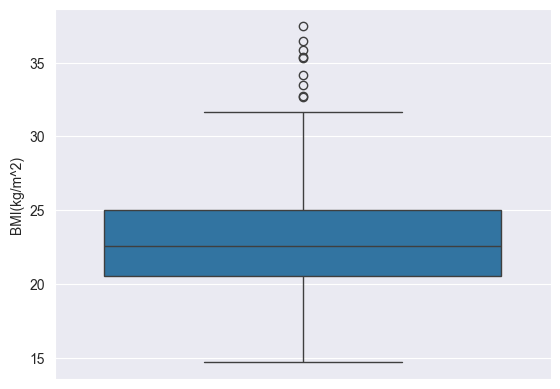

In [17]:
sns.boxplot(data = blood_pressure_df["BMI(kg/m^2)"])

<Axes: >

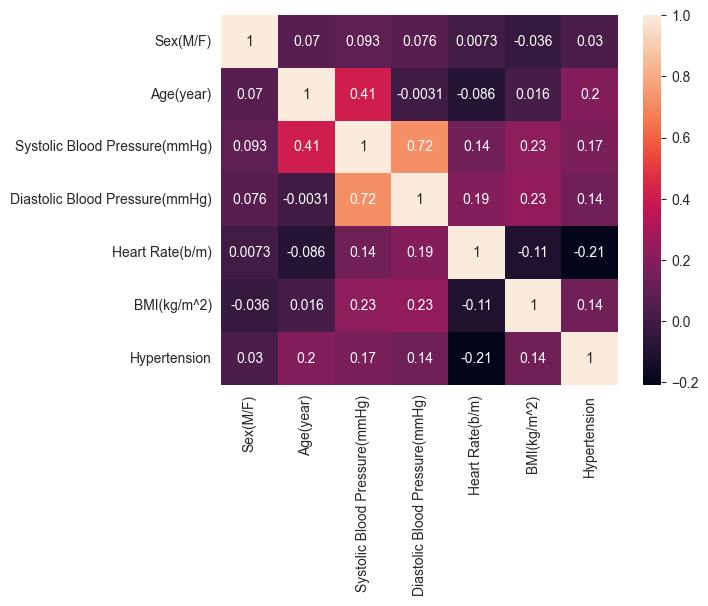

In [18]:
sns.heatmap(data = corr_matrix, annot=True)

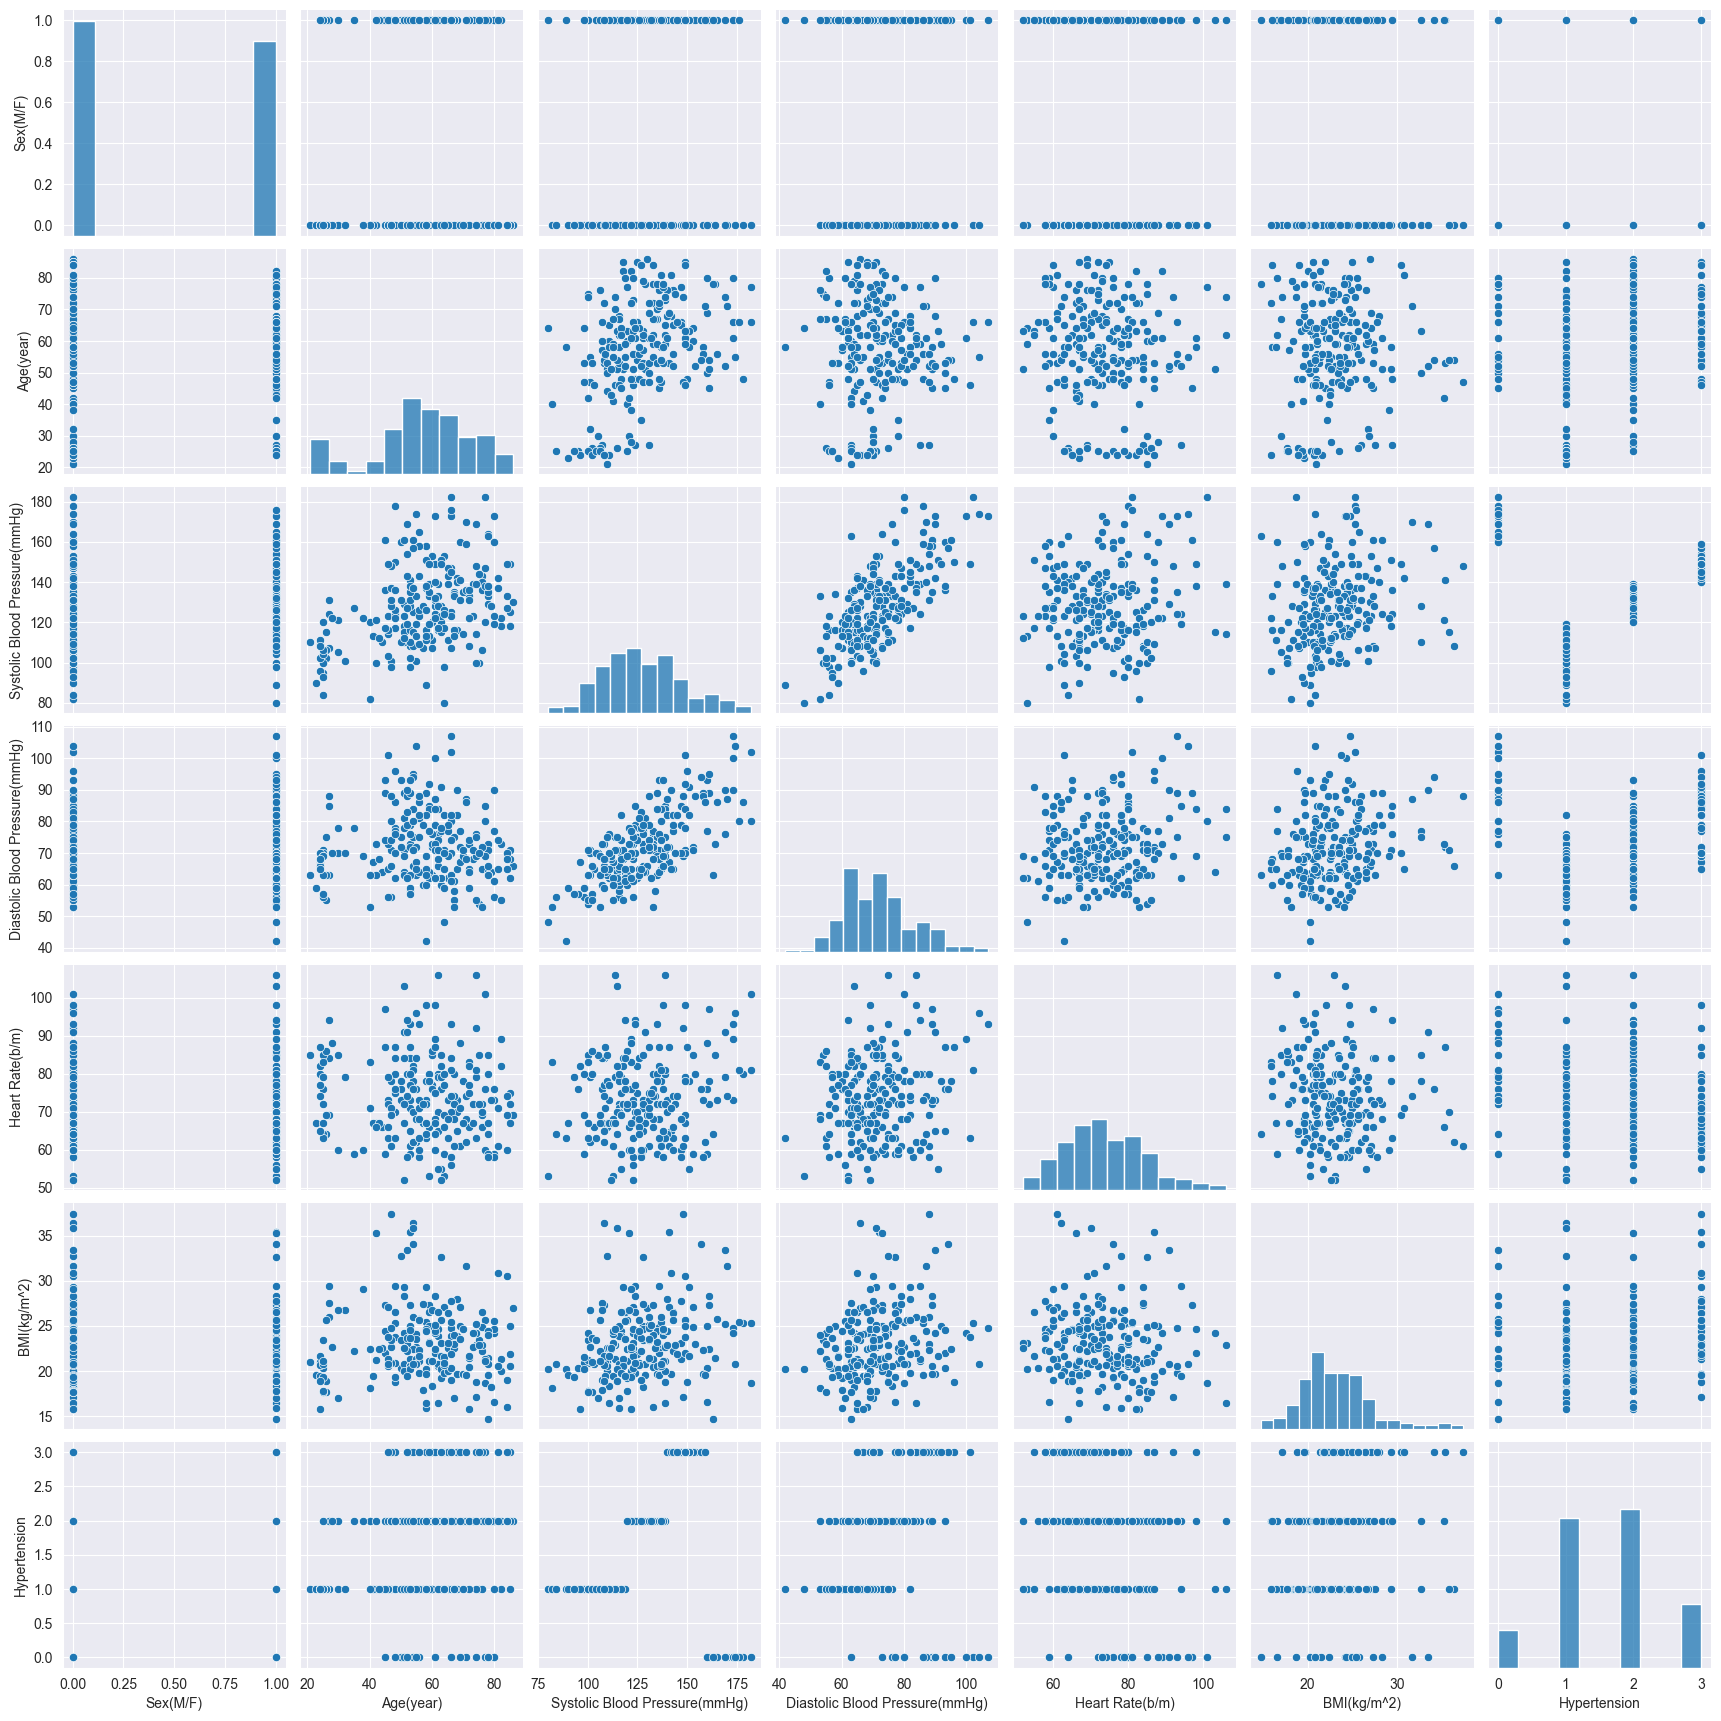

In [19]:
sns.pairplot(data = blood_pressure_df)

In [20]:
bp_df_dummies = pd.get_dummies(blood_pressure_df["Hypertension"])

In [21]:
bp_df_dummies

,0,1,2,3
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
214,False,True,False,False
215,False,True,False,False
216,False,False,True,False
217,False,True,False,False


In [22]:
bp_df_dummies = pd.merge(blood_pressure_df[blood_pressure_df.columns[:6]], bp_df_dummies, left_index=True, right_index=True)

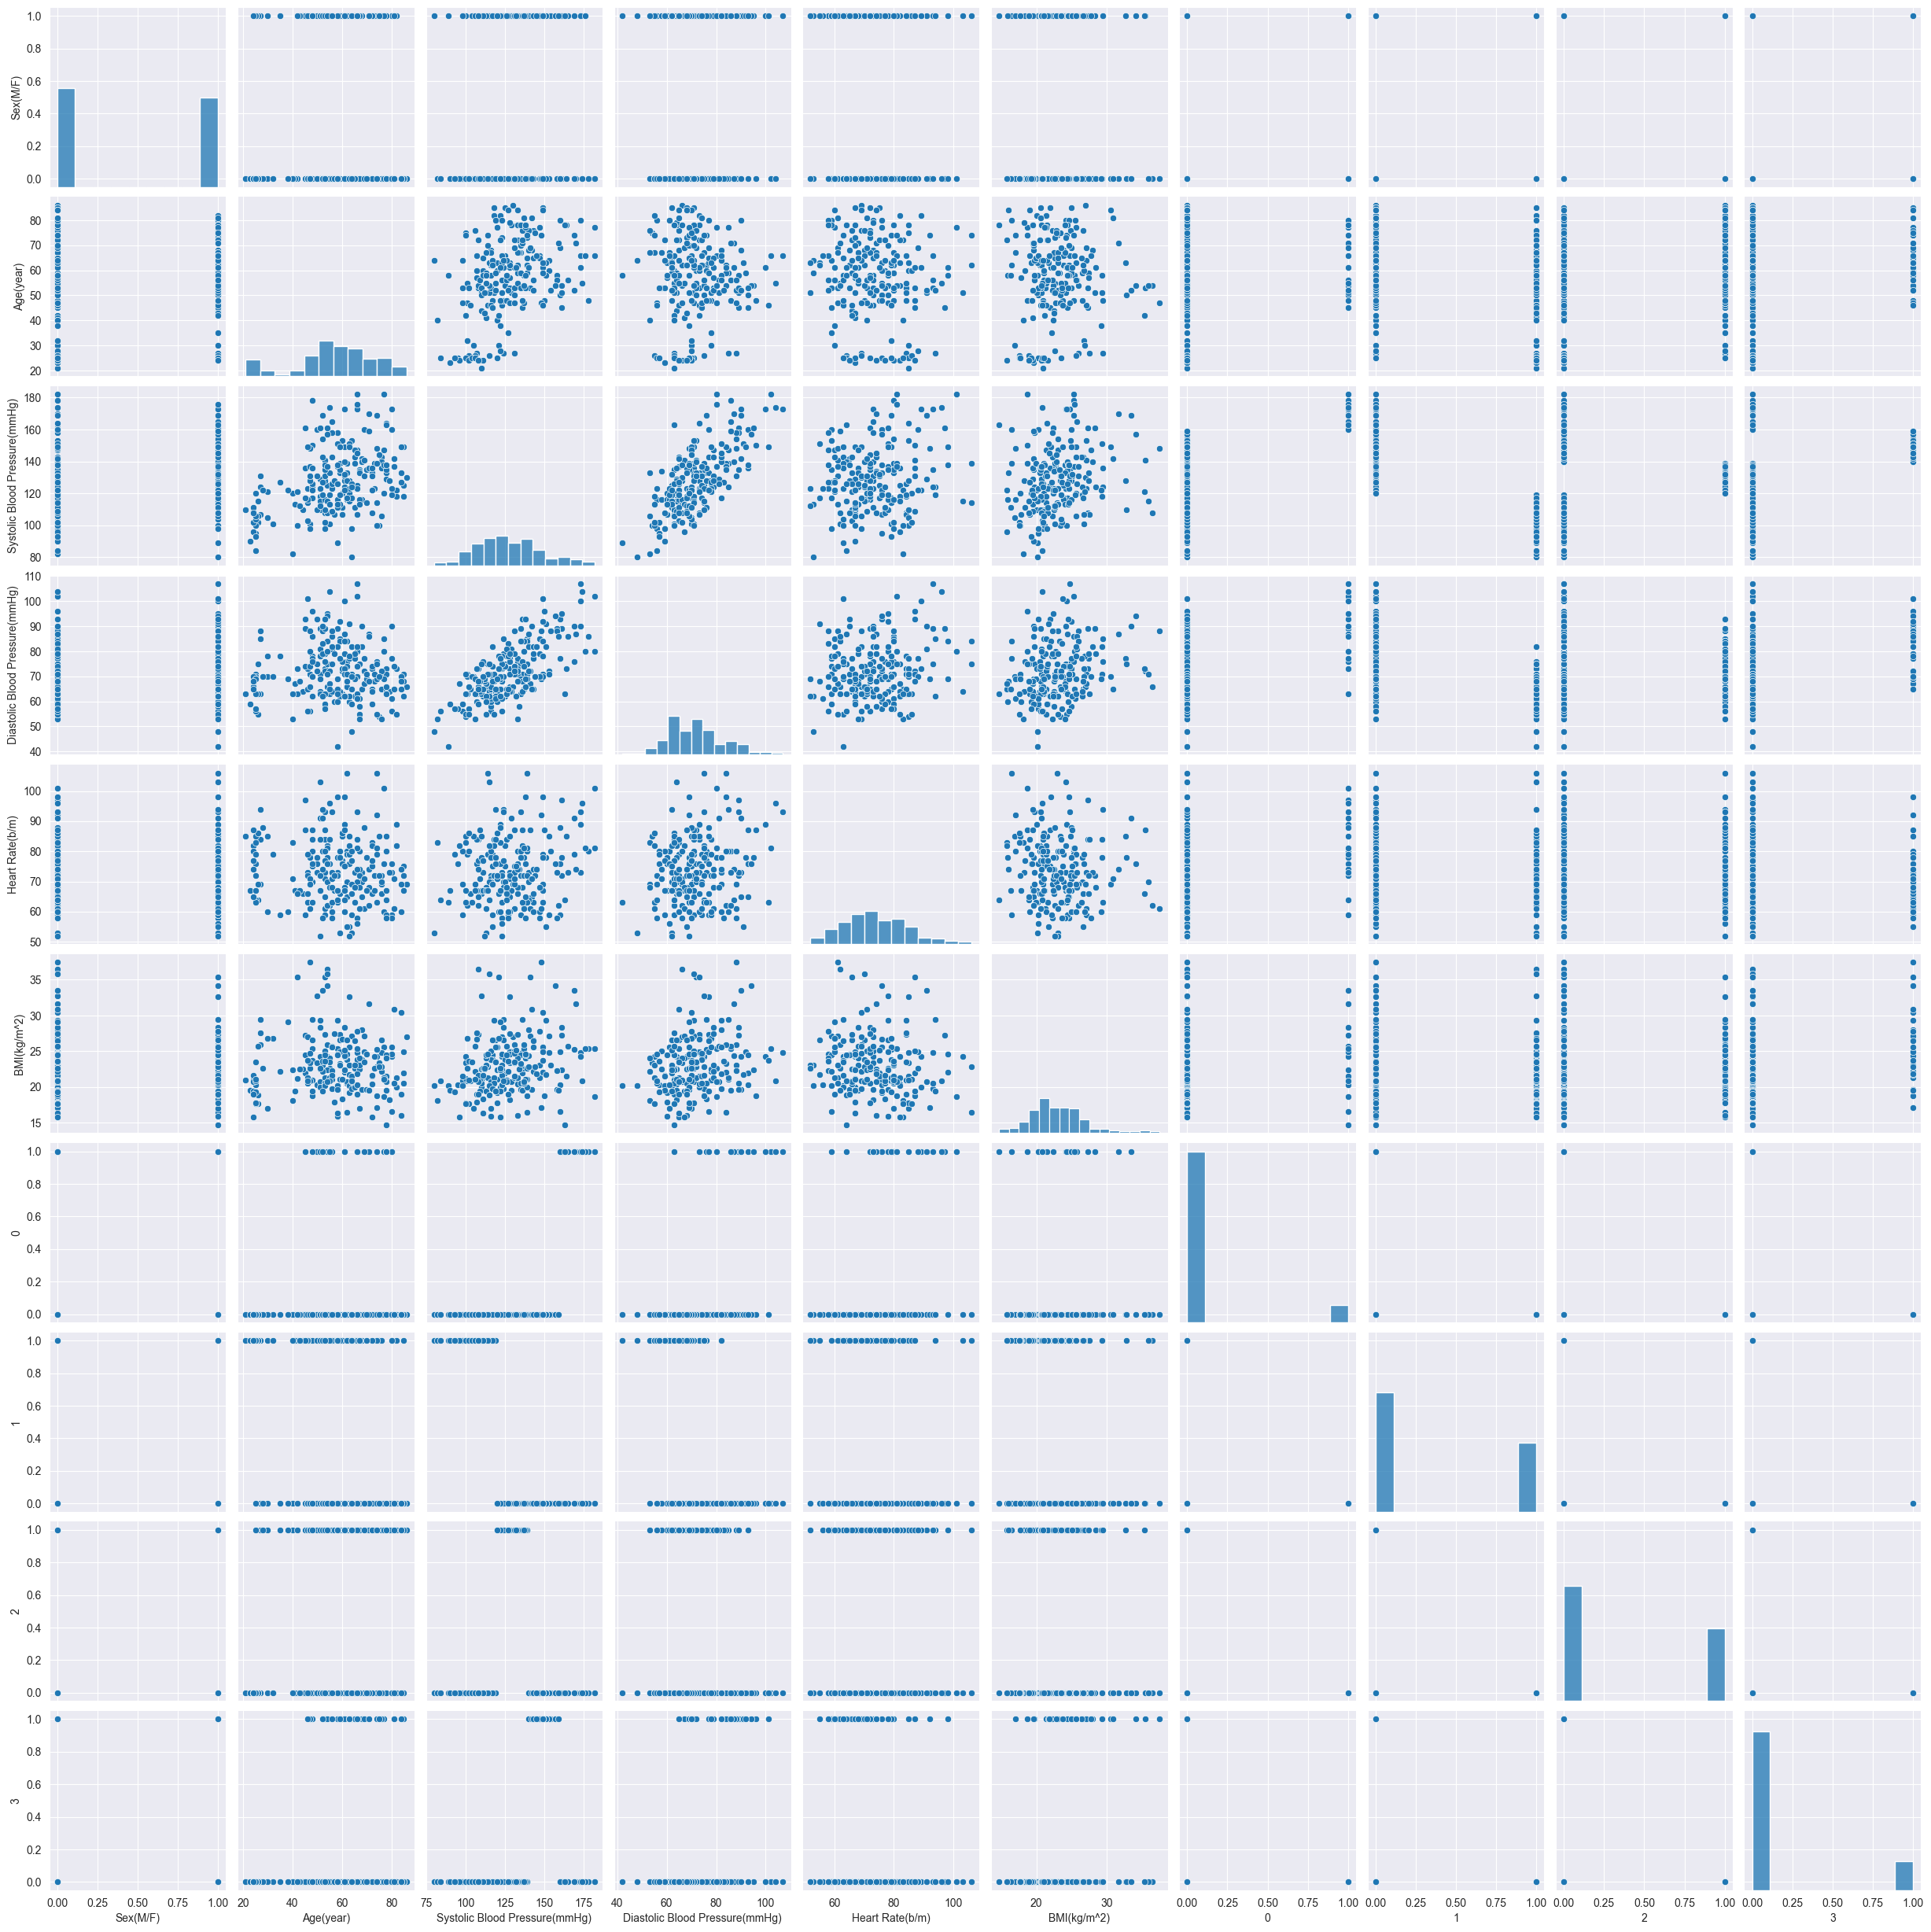

In [23]:
sns.pairplot(data = bp_df_dummies)

<Axes: >

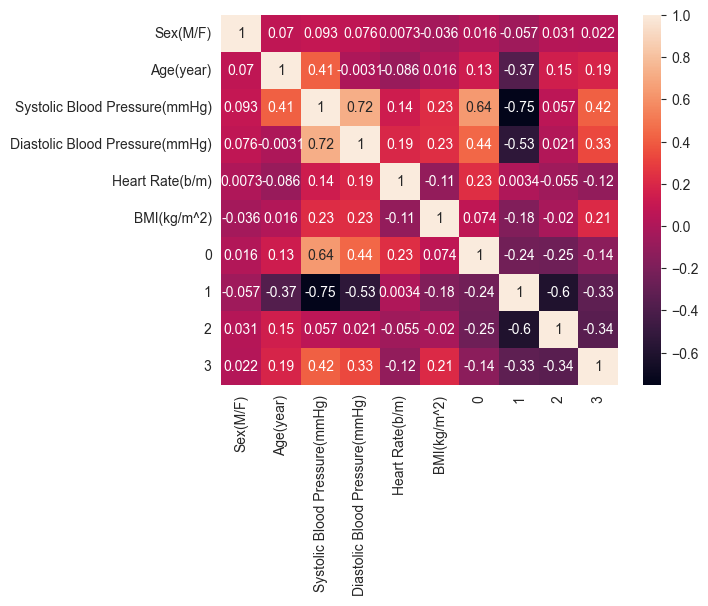

In [24]:
corr_matrix = bp_df_dummies.corr()
sns.heatmap(data = corr_matrix, annot=True)

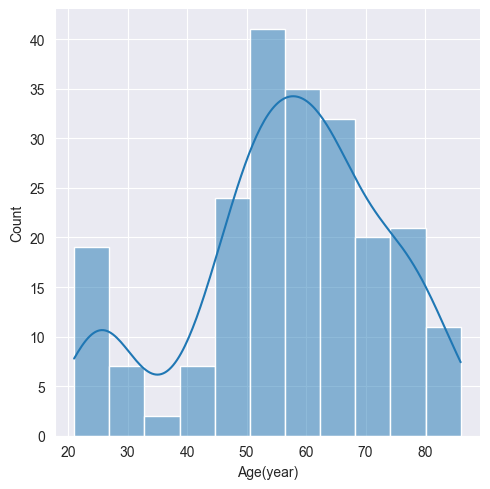

In [25]:
sns.displot(bp_df_dummies["Age(year)"], kde = True)

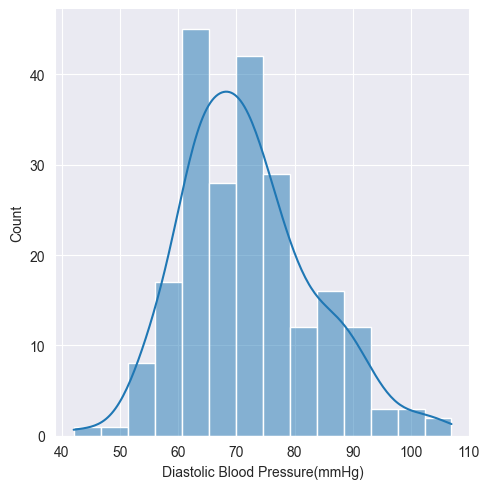

In [26]:
sns.displot(bp_df_dummies["Diastolic Blood Pressure(mmHg)"], kde = True)

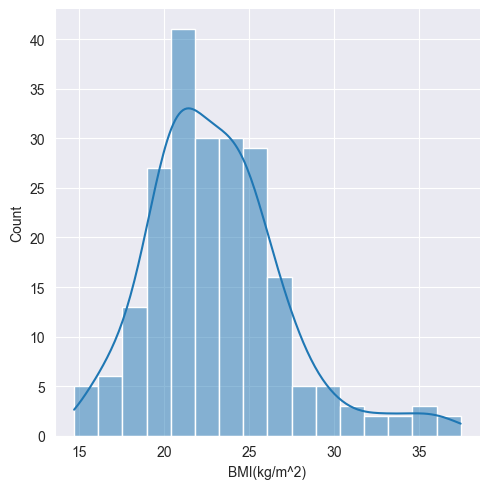

In [27]:
sns.displot(bp_df_dummies["BMI(kg/m^2)"], kde = True)

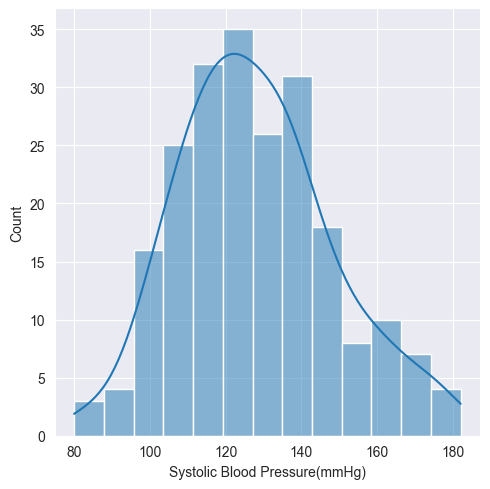

In [28]:
sns.displot(bp_df_dummies["Systolic Blood Pressure(mmHg)"], kde = True)

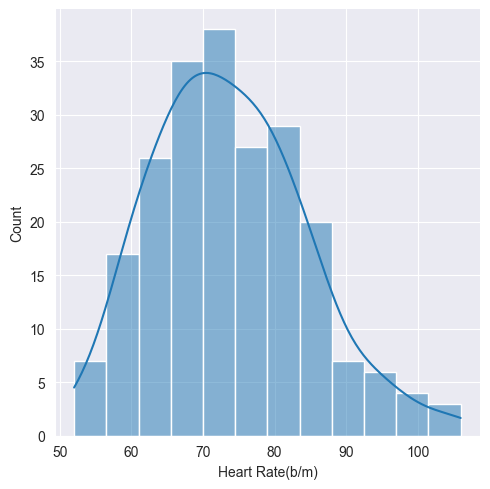

In [29]:
sns.displot(bp_df_dummies["Heart Rate(b/m)"], kde = True)

In [30]:
scores = (SelectKBest(score_func = chi2, k = "all").
          fit(blood_pressure_df[blood_pressure_df.columns[:6]],
              blood_pressure_df[["Hypertension"]]))

In [31]:
df_scores = pd.DataFrame(scores.scores_)
df_columns = pd.DataFrame(blood_pressure_df.columns[:6])

featuresScores = pd.concat([df_scores, df_columns], axis = 1)
featuresScores.columns = ["Score", "Features"]

featuresScores.sort_values(by = ["Score"], inplace = True, ascending = False)
featuresScores

,Score,Features
2,618.582737,Systolic Blood Pressure(mmHg)
3,167.901374,Diastolic Blood Pressure(mmHg)
1,140.659789,Age(year)
4,21.240706,Heart Rate(b/m)
5,9.738388,BMI(kg/m^2)
0,0.373381,Sex(M/F)


Пытаемся преобразовать в нормальное распределение

In [49]:
test = np.sqrt(abs(bp_df_dummies["Age(year)"] - bp_df_dummies["Age(year)"].mean()))

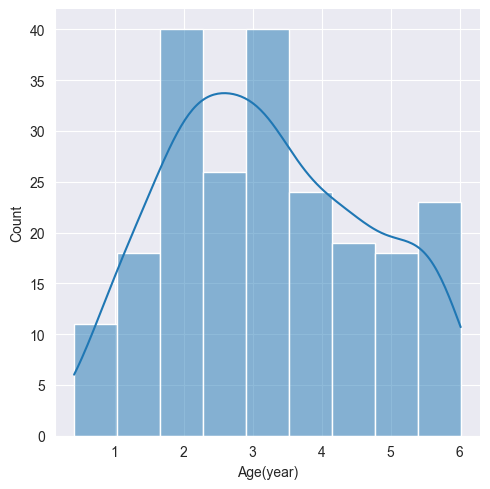

In [53]:
sns.displot(test, kde = True)

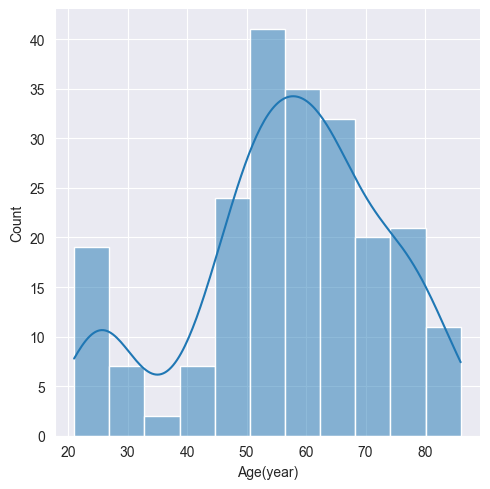

In [52]:
sns.displot(bp_df_dummies["Age(year)"], kde = True)

<Axes: ylabel='Age(year)'>

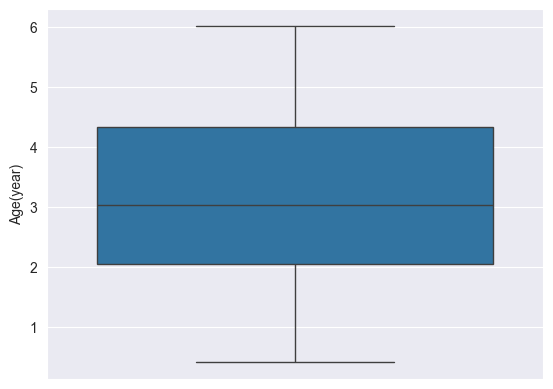

In [54]:
sns.boxplot(test)

Надо избавиться от выбросов

In [32]:
bp_df_dummies_copy = bp_df_dummies.copy()

In [33]:
lower_q = bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"].quantile(0.05)
upper_q = bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"].quantile(0.95)

bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"] = bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"].clip(lower = lower_q, upper = upper_q)

<Axes: ylabel='Diastolic Blood Pressure(mmHg)'>

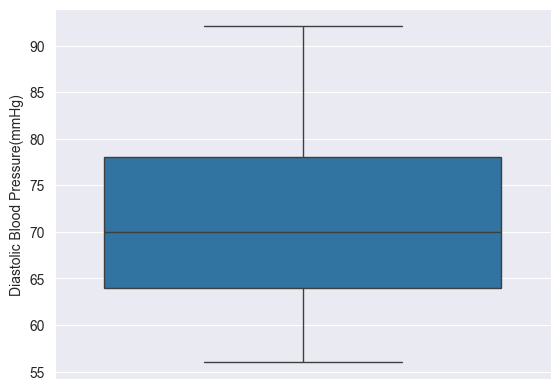

In [34]:
sns.boxplot(bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"])

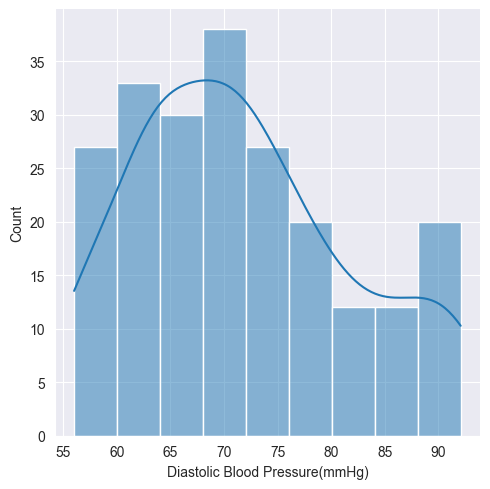

In [35]:
sns.displot(bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"], kde = True)

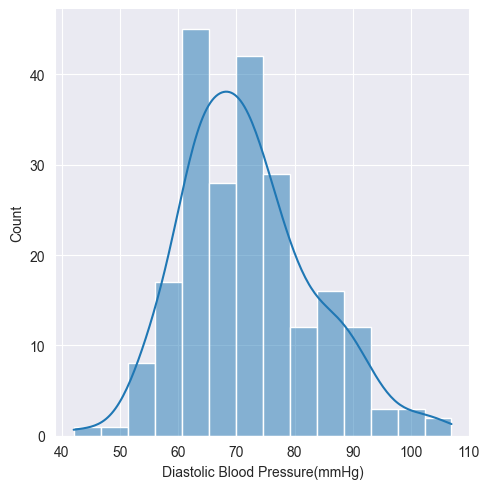

In [36]:
sns.displot(bp_df_dummies["Diastolic Blood Pressure(mmHg)"], kde = True)

Думал объединить два признака: предгипертензию и гипертензию 1-ой стадии. Но, видимо, неудачно

In [37]:
percent_of_true_values = []

for i in range(len(bp_df_dummies.columns[6:])):
    percent_of_true_values.append((bp_df_dummies[i] == True).sum() / len(bp_df_dummies) * 100)

percent_of_true_values = pd.DataFrame(percent_of_true_values)
percent_of_true_values.index = ["2 Stage", "Normal", "Prehypertension", "1 Stage"]
percent_of_true_values.columns = ["Percent of True Values"]
percent_of_true_values

,Percent of True Values
2 Stage,9.132420
Normal,36.529680
Prehypertension,38.812785
1 Stage,15.525114


In [38]:
bp_df_dummies3 = pd.DataFrame()

bp_df_dummies3[0] = bp_df_dummies[0]
bp_df_dummies3[1] = bp_df_dummies[1]
bp_df_dummies3[2] = bp_df_dummies[2] | bp_df_dummies[3]

bp_df_dummies3

,0,1,2
0,True,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
214,False,True,False
215,False,True,False
216,False,False,True
217,False,True,False


In [39]:
bp_df_dummies3 = pd.merge(blood_pressure_df[blood_pressure_df.columns[:6]], bp_df_dummies3, left_index=True, right_index=True)

<Axes: >

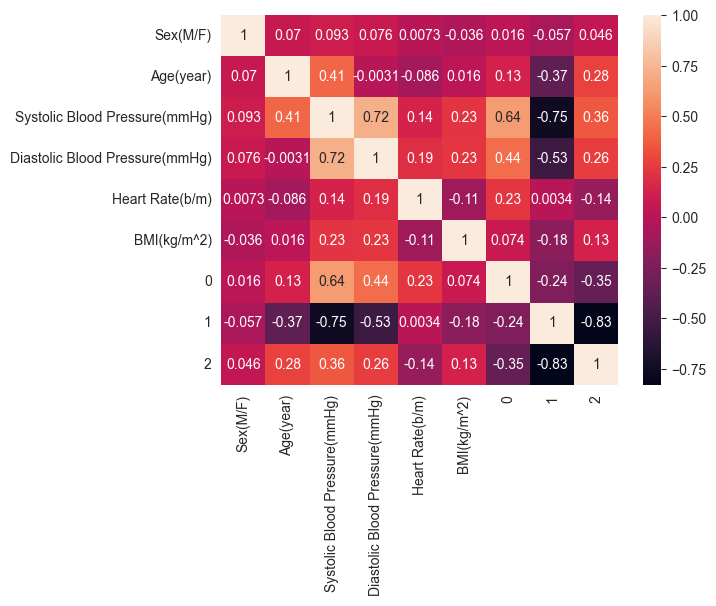

In [40]:
sns.heatmap(data = bp_df_dummies3.corr(), annot=True)

<Axes: >

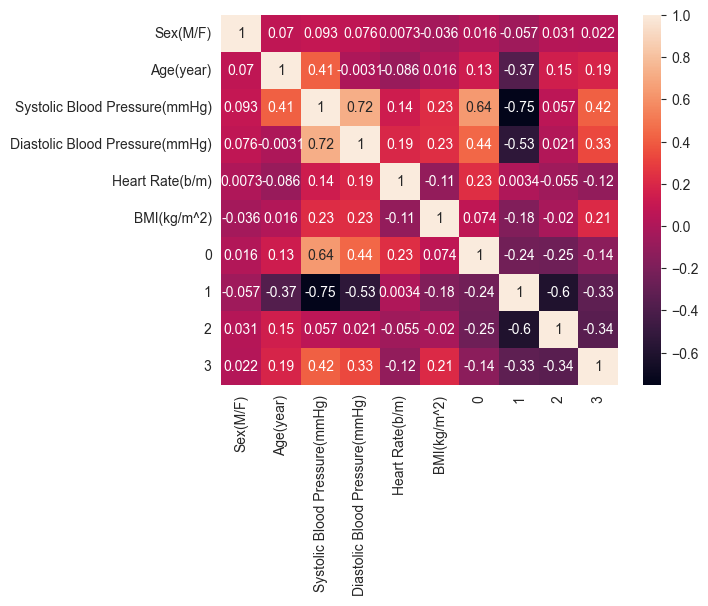

In [41]:
sns.heatmap(bp_df_dummies.corr(), annot=True)

In [42]:
bp_df_dummies_copy = bp_df_dummies.copy()

In [43]:
for i in bp_df_dummies_copy.columns[:6][1:]:
    st = StandardScaler().fit(bp_df_dummies_copy[[i]])
    bp_df_dummies_copy[i] = st.transform(bp_df_dummies_copy[[i]])

In [44]:
bp_df_dummies_copy

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),0,1,2,3
0,0,-0.768337,1.625816,1.547085,2.180326,1.041372,True,False,False,False
1,0,-0.452641,1.576631,1.907907,0.220334,-0.706481,True,False,False,False
2,0,-0.642058,-1.325313,-0.076613,0.500333,-0.555281,False,True,False,False
3,1,-0.768337,0.396179,1.907907,1.246997,-0.284352,False,False,True,False
4,0,-0.705198,-0.243232,0.103798,-0.059665,0.988096,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
214,1,-2.094258,-0.833458,-0.166818,0.313667,-0.376059,False,True,False,False
215,0,-2.031119,-1.718797,-1.339489,0.500333,-0.949728,False,True,False,False
216,1,-2.031119,-0.390789,-0.257024,-0.152998,-1.339503,False,False,True,False
217,1,-2.031119,-1.079386,-0.257024,-0.619663,-0.515002,False,True,False,False
